In [1]:
import pandas as pd
import math
from scipy.stats import skew, kurtosis
from statsmodels.tsa import stattools
import csv
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

In [2]:
path = r'C:/Users/aparajitas/OneDrive - Adobe/Documents/Aparajita_P/Chetan/User Identification From Walking Activity/User Identification From Walking Activity' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    
    for x in ['X']:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

    for y in ['Y']:
        q75,q25 = np.percentile(df.loc[:,y],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[y] < min,y] = np.nan
        df.loc[df[y] > max,y] = np.nan
        
    for z in ['Z']:
        q75,q25 = np.percentile(df.loc[:,z],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[z] < min,z] = np.nan
        df.loc[df[z] > max,z] = np.nan
        df['Z'] = df['Z'].abs()
           
    df = df.dropna(axis = 0)
    
    df["vector"] = df["X"].pow(2) + df["Y"].pow(2) + df["Z"].pow(2) 
    df["vector"] = df["vector"].pow(1/2)
    
    df=df.drop(['t','X','Y'], axis = 1)
    
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame_gmm = pd.concat(li, axis=0, ignore_index=True)
frame4 = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.isnull().sum()

Z         0
vector    0
dtype: int64

In [4]:
frame.shape

(99637, 2)

In [5]:
frame.head()

,Z,vector
0,2.9148,8.213224
1,2.5334,11.903599
2,2.5334,10.884842
3,2.7241,10.396885
4,2.7922,9.998056


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

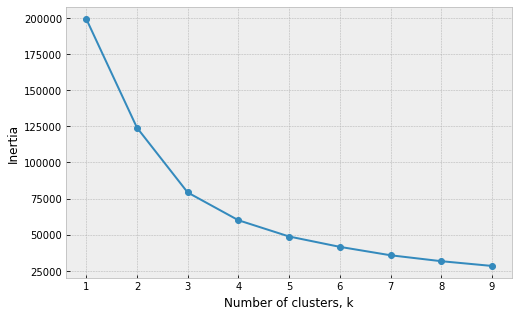

In [7]:
scaler = StandardScaler()
Data = scaler.fit_transform(frame)
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [8]:
frame_kmeans=frame

from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
frame_kmeans['cluster'] = kmeans.fit_predict(frame_kmeans[['Z','vector']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
frame_kmeans['cen_x'] = frame_kmeans.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
frame_kmeans['cen_y'] = frame_kmeans.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#ff007f']
frame_kmeans['c'] = frame_kmeans.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

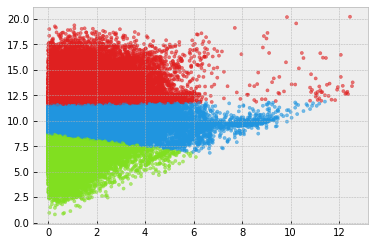

In [9]:
import matplotlib.pyplot as plt
plt.scatter(frame_kmeans.Z, frame_kmeans.vector, c=frame_kmeans.c, alpha = 0.6, s=10)

In [10]:
kmeans.inertia_

299583.56999139366

In [11]:
kmeans.cluster_centers_

array([[ 1.73275138, 13.45372439],
       [ 0.97230483,  6.84500103],
       [ 1.86631204,  9.76751722]])

In [13]:
kmeans.n_iter_

9

In [14]:
kmeans.labels_

array([2, 0, 2, ..., 1, 1, 1])

In [15]:
test = pd.read_csv("C:/Users/aparajitas/Downloads/dataset2.csv")

In [16]:
df1 = test.head()

In [17]:
test.describe

<bound method NDFrame.describe of             date                   t username   activity       Z       X  \
0      1/30/2022  13:51:15:847724020   chetan  slow walk  0.2650 -0.7814   
1      1/30/2022  13:51:16:246945023   chetan  slow walk  0.6722 -1.1233   
2      1/30/2022  13:51:16:446233987   chetan  slow walk  0.4399 -1.4817   
3      1/30/2022  13:51:16:646117985   chetan  slow walk  0.3031 -0.8125   
4      1/30/2022  13:51:16:846738994   chetan  slow walk  0.4814 -0.9312   
...          ...                 ...      ...        ...     ...     ...   
38289   2/9/2022   20:9:15:317911028   chetan  slow walk  0.3084 -0.8376   
38290   2/9/2022   20:9:15:517889022   chetan  slow walk  0.4977 -1.0027   
38291   2/9/2022   20:9:15:717828989   chetan  slow walk  0.4587 -1.1780   
38292   2/9/2022   20:9:15:917932987   chetan  slow walk  0.2590 -0.8582   
38293   2/9/2022   20:9:16:117410004   chetan  slow walk  0.3140 -0.8008   

            Y    vector  
0     -0.0076  0.825148  
1

In [18]:
df1

,date,t,username,activity,Z,X,Y,vector
0,1/30/2022,13:51:15:847724020,chetan,slow walk,0.2650,-0.7814,-0.0076,0.825148
1,1/30/2022,13:51:16:246945023,chetan,slow walk,0.6722,-1.1233,-0.2344,1.329887
2,1/30/2022,13:51:16:446233987,chetan,slow walk,0.4399,-1.4817,0.0722,1.547307
3,1/30/2022,13:51:16:646117985,chetan,slow walk,0.3031,-0.8125,0.0888,0.871729
4,1/30/2022,13:51:16:846738994,chetan,slow walk,0.4814,-0.9312,0.0359,1.048889


In [19]:
df2 = df1.drop(['date','t','X','Y','username','activity'], axis = 1)

In [20]:
df2

,Z,vector
0,0.2650,0.825148
1,0.6722,1.329887
2,0.4399,1.547307
3,0.3031,0.871729
4,0.4814,1.048889


In [21]:
kmeans.transform(df2)

array([[12.713585  ,  6.06126343,  9.08461188],
       [12.1701358 ,  5.52327323,  8.52170813],
       [11.97640321,  5.32437924,  8.34305119],
       [12.66295832,  6.01064181,  9.03209176],
       [12.46779132,  5.81686358,  8.82793627]])

In [22]:
kmeans.predict(df2)

array([1, 1, 1, 1, 1])

In [23]:
df_fast = pd.read_csv("C:/Users/aparajitas/Downloads/dataset2fast.csv")

In [24]:
df_fast2 = df_fast.drop(['date','t','X','Y','username','activity'], axis = 1)

In [25]:
df_fast2.head()
df_fast2.describe

<bound method NDFrame.describe of            Z    vector
0     3.3880  3.394230
1     2.1690  2.396770
2     3.4887  3.651331
3     2.6972  2.896714
4     3.2452  3.350735
...      ...       ...
2653  2.1463  3.214162
2654  2.3787  3.478125
2655  2.2489  2.986729
2656  2.5963  3.615108
2657  2.2590  3.872905

[2658 rows x 2 columns]>

In [26]:
df_fast3=df_fast2.head()

In [27]:
kmeans.predict(df_fast3)

array([1, 1, 1, 1, 1])

In [28]:
df_run = pd.read_csv("C:/Users/aparajitas/Downloads/dataset2run.csv")

In [29]:
df_run2 = df_run.drop(['date','t','X','Y','username','activity'], axis = 1)

In [30]:
df_run2.head()
df_run2.describe

<bound method NDFrame.describe of           Z    vector
0    4.0475  4.074634
1    4.4313  4.610782
2    4.0215  4.277629
3    4.2238  4.257374
4    4.2949  4.372995
..      ...       ...
196  4.3748  4.628126
197  4.3217  4.616702
198  4.0802  4.637597
199  4.1400  4.782581
200  4.2401  4.917740

[201 rows x 2 columns]>

In [31]:
df_run3=df_run2.head()

In [32]:
kmeans.predict(df_run3)

array([1, 1, 1, 1, 1])

In [33]:
print(kmeans.predict(df_run2))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
